# Part I. Root-finding. Newton's iteration.

Write a function which performs Newton's iteration for a given function $f(x)$ with known derivative $f'(x)$. Your function should find the root of $f(x)$ with a predefined absolute accuracy $\epsilon$. 

In [ ]:
import numpy as np 
import cmath 
from numpy.testing import assert_allclose

import matplotlib.pyplot as plt 
%matplotlib inline 

In [ ]:
#Python 3

# Find a root of $f(x) = 0$ via Newton's iteration starting from x0.
    
#     Parameters
#     ----------
#     f : callable
#         The function to find a root of.
#     fder : callable
#         The derivative of `f`.
#     x0 : float
#         Initial value for the Newton's iteration.
#     eps : float
#         The target accuracy. 
#         The iteration stops when the distance between successive iterates is below `eps`.
#         Default is 1e-5.
#     maxiter : int
#         The maximum number of iterations (default is 1000.)
#         Iterations terminate if the number of iterations exceeds `maxiter`.
#         This parameter is only needed to avoid infinite loops if iterations wander off.
        
#     Returns
#     -------
#     x : float
#         The estimate for the root.
#     niter : int
#         The number of iterations.

def newton_iteration(f, fder, x0, eps=1e-5, maxiter=1000):

    var_x = x0 - f(x0) / fder(x0) #first item
    iteration_count = 0
    
    while (abs(var_x - x0) > eps): #condition to run through till maximum number of iterations
        x0 = var_x
        var_x = x0 - f(x0) / fder(x0)
        iteration_count += 1 
        
        if iteration_count > maxiter:
            break
    
    return var_x, iteration_count

### Test I.1 

Test your implementation on a simple example, $f(x) = x^2 - 1$ or similar. (20% of the total grade)

In [ ]:
#making use of the lambda function available with the math library

f = lambda x: x**2 - 1
fder = lambda x: 2 * x

In [ ]:
root, iteration_count = newton_iteration(f, fder, 0.05)

print('Root:', root)
print('Times iterated:', iteration_count)

Root: 1.0000000000149214
Times iterated: 7


### Test I.2

Now consider a function which has a multiple root. Take $f(x) = (x^2 - 1)^2$ as an example. Implement a modified Newton's iteraion,

$$
x_{n+1} = x_{n} - m \frac{f(x_n)}{f'(x_n)}
$$

and vary $m= 1, 2, 3, 4, 5$. Check the number of iterations required for convergence within a fixed $\epsilon$. Are your observations consistent with the expectation that the convergence is quadratic is $m$ equals the multiplicity of the root, and is linear otherwise? (40% of the total grade)

In [ ]:
#making use of the lambda function available with the math library

f = lambda x: (x**2 - 1)**2
fder = lambda x: 4 * x * (x**2 - 1)

In [ ]:
def modified_newton_iteration(f, fder, x0, m, eps=1e-5, maxiter=1000):
    
    var_x = x0 - m * f(x0) / fder(x0)
    iteration_count = 0
    
    while (abs(var_x - x0) > eps): 
        x0 = var_x
        var_x = x0 - m * f(x0) / fder(x0)
        iteration_count += 1 
        
        if iteration_count > maxiter: 
            var_x = 'Nan'
            break
    
    return var_x, iteration_count

In [ ]:
for k in range(1, 6): 
    root, iteration_count = modified_newton_iteration(f, fder, 3.1415, k)
    print('m:', k, '\troot:', root, '\titeration:', iteration_count)

m: 1 	root: 1.0000069974813859 	iteration: 19
m: 2 	root: 1.0 	iteration: 5
m: 3 	root: 0.9999971272941264 	iteration: 13
m: 4 	root: Nan 	iteration: 1001
m: 5 	root: Nan 	iteration: 1001


# Part II. Fixed-point iteration

Consider the following equation:

$$
\sqrt{x} = \cos{x}
$$

Plot the left-hand side and right-hand side of this equation, and localize the root graphically. Estimate the location of the root by visual inspection of the plot.

Write a function which finds the solution using fixed-point iteration up to a predefined accuracy $\epsilon$. Compare the result to an estimate from a visual inspection.

Next, rewrite the fixed-point problem in the form

$$
x = x - \alpha f(x)
$$

where $\alpha$ is the free parameter. Check the dependence of the number of iterations required for a given $\epsilon$ on $\alpha$. Compare your results to an expectation that the optimal value of $\alpha$ is given by 

$$
\alpha = \frac{2}{m + M}
$$

where $0 < m < |f'(x)| < M$ over the localization interval. (40% of the total grade)

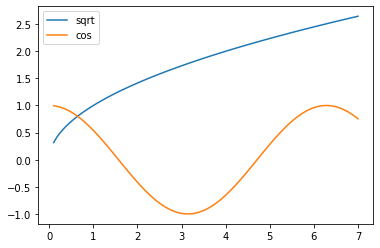

In [ ]:
x = np.linspace(0.1, 7, 100)

plt.plot(x, np.sqrt(x), label='sqrt')
plt.plot(x, np.cos(x), label='cos')
plt.legend()

In [ ]:
#making use of the lambda function available with the math library

f = lambda x: np.sqrt(x) - np.cos(x)
fder = lambda x: 1 / (2 * np.sqrt(x)) - np.sin(x)

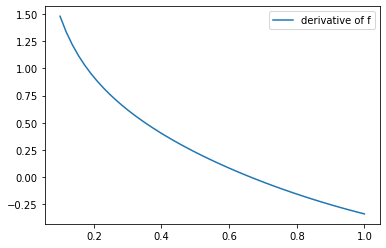

In [ ]:
x = np.linspace(0.1, 1, 50)
plt.plot(x, fder(x), label='derivative of f')
plt.legend()

In [ ]:
def newton_iteration_fixed_poinit(f, fder, x0, alpha, eps=1e-5, maxiter=1000):
    
    var_x = x0 - alpha * f(x0)
    iteration_count = 0
    
    while (abs(var_x - x0) > eps): 
        x0 = var_x
        var_x = x0 - alpha * f(x0)
        iteration_count += 1 
        
        if iteration_count > maxiter: 
            var_x = 'Nan'
            break
    
    return var_x, iteration_count

In [ ]:
x0 = 2 / 3

for k in [0.1, 0.5, 1, 1.5]: 
    root, iteration_count = newton_iteration_fixed_poinit(f, fder, x0, k)
    print('alpha:', k, '\troot:', root, '\titeration:', iteration_count)

alpha: 0.1 	root: 0.6417846268333629 	iteration: 44
alpha: 0.5 	root: 0.6417193751949732 	iteration: 8
alpha: 1 	root: 0.6417136823927276 	iteration: 6
alpha: 1.5 	root: 0.6417185143046147 	iteration: 47


# Part III. Newton's fractal.

(Not graded). 

Consider the equation

$$
x^3 = 1
$$

It has three solutions in the complex plane, $x_k = \exp(i\, 2\pi k/ 3)$, $k = 0, 1, 2$.

The Newton's iterations converge to one of these solutions, depending on the starting point in the complex plane (to converge to a complex-valued solution, the iteration needs a complex-valued starting point).

Plot the \emph{basins of attraction} of these roots on the complex plane of $x$ (i.e., on the plane $\mathrm{Re}x$ -- $\mathrm{Im}x$). To this end, make a series of calculations, varying the initial conditions on a grid of points. 
Color the grid in three colors, according to the root, to which iterations converged.

In [ ]:
#making use of the lambda function available with the math library

f = lambda x: x**3 - 1
fder = lambda x: 3 * x**2 

In [ ]:
def newton_iteration_fractal(f, fder, x0, y0, eps=1e-5, maxiter=1000):
    num = complex(x0, y0)
    var_x = num - f(num) / fder(num)
    iteration_count = 0
    
    while (abs(var_x - num) > eps): 
        num = var_x
        var_x = num - f(num) / fder(num)
        iteration_count += 1 
        
        if iteration_count > maxiter: 
            var_x = 'Nan'
            break
    
    return var_x

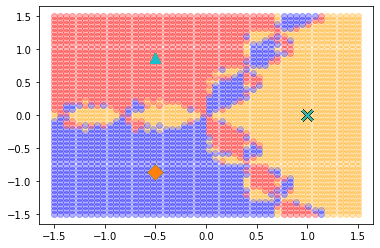

In [ ]:
X, Y = np.linspace(-1.5, 1.5, 50), np.linspace(-1.5, 1.5, 50)

for x in X: 
    for y in Y: 
        sol = newton_iteration_fractal(f, fder, x, y)
        
        if sol != 'Nan': 
            if abs(sol.imag) < 1e-8: 
                plt.scatter(sol.real, sol.imag, marker='x', s=100)
                plt.scatter(x, y, marker='o', color='orange', alpha=0.3)
                
            elif sol.imag < 0: 
                plt.scatter(sol.real, sol.imag, marker='D', s=100)
                plt.scatter(x, y, marker='o', color='blue', alpha=0.3)
                
            else: 
                plt.scatter(sol.real, sol.imag, marker='^', s=100)
                plt.scatter(x, y, marker='o', color='red', alpha=0.3)